<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


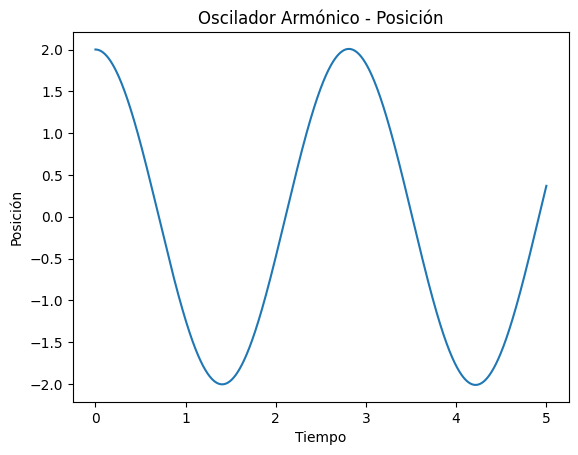

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def fun(t, y, params):
    gamma = params[0]
    omega = params[1]
    dydt = y[1]
    dvdt = -gamma * y[1] - omega * y[0]
    return np.array([dydt, dvdt])

gamma = 0.0
omega = 5  # radianes/s
params = (gamma, omega)
y0 = 2
v0 = 1E-12
y_ci = np.array([y0, v0])
t = np.linspace(0, 5, 10000)
h = t[1] - t[0]
N = len(t)
y = np.zeros(N)
v = np.zeros(N)
y[0] = y_ci[0]
v[0] = y_ci[1]

for i in range(1, len(t)):
    y[i] = y[i - 1] + h * fun(t[i - 1], y_ci, params)[0]
    v[i] = v[i - 1] + h * fun(t[i - 1], y_ci, params)[1]
    y_ci[0] = y[i]
    y_ci[1] = v[i]

plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Oscilador Armónico - Posición')
plt.show()


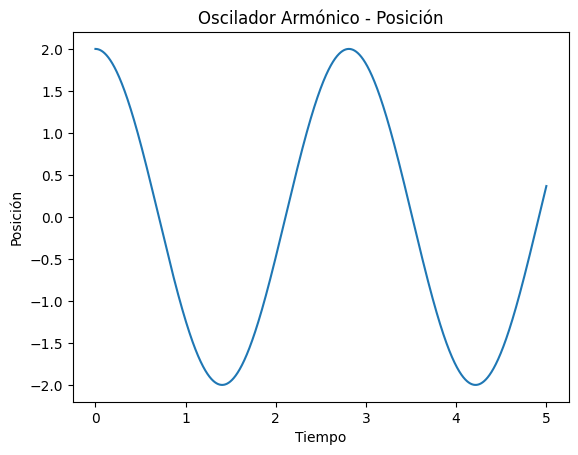

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def fun(y, t, gamma, omega):
    dydt = y[1]
    dvdt = -gamma * y[1] - omega * y[0]
    return np.array([dydt, dvdt])

gamma = 0.0
omega = 5  # radianes/s
params = (gamma, omega)
y0 = np.array([2, 1E-12])
t = np.linspace(0, 5, 10000)

# Resolver el sistema de ecuaciones diferenciales con odeint
sol = odeint(fun, y0, t, args=params)

# Extraer las soluciones para y y v
y, v = sol.T

# Gráfico de la posición
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Oscilador Armónico - Posición')
plt.show()


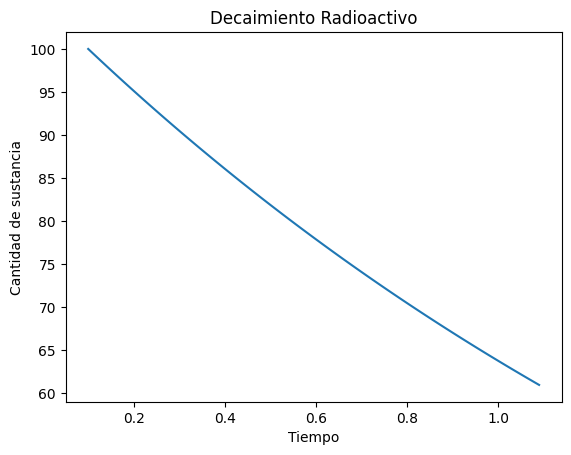

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fun(t, y, *params):
    lamda = params[0]
    f = -lamda * y
    return f

Tini = 0.1
h = 0.01
N = 100
lamda = 0.5
Tmax = Tini + N * h
t = np.arange(Tini, Tmax, h)
y = np.zeros(len(t))
y[0] = 100
params = (lamda,)


for i in range(len(t) - 1):
    k1 = fun(t[i], y[i], *params)
    k2 = fun(t[i] + h/2, y[i] + h/2 * k1, *params)
    k3 = fun(t[i] + h/2, y[i] + h/2 * k2, *params)
    k4 = fun(t[i] + h, y[i] + h * k3, *params)
    y[i + 1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de sustancia')
plt.title('Decaimiento Radioactivo')
plt.show()


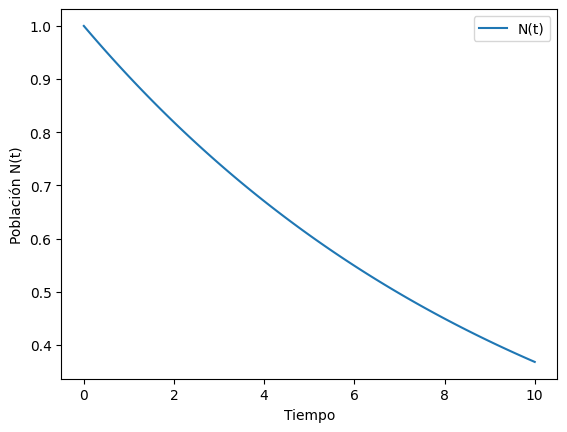

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
def model(N, t, lmbda):
    dNdt = -lmbda * N
    return dNdt

# Condición inicial
N0 = 1

# Constante positiva
lmbda = 0.1

# Tiempo de integración
t = np.linspace(0, 10, 100)  # ajusta según tus necesidades

# Resolver la ecuación diferencial usando odeint
solution = odeint(model, N0, t, args=(lmbda,))

# Graficar la solución
plt.plot(t, solution[:, 0], label='N(t)')
plt.xlabel('Tiempo')
plt.ylabel('Población N(t)')
plt.legend()
plt.show()
